In [4]:
import numpy as np 
import pandas as pd

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {'axes.axisbelow': False})

import warnings
warnings.filterwarnings("ignore")

In [6]:
data_2015 = pd.read_csv("./2015.csv")
data_2016 = pd.read_csv("./2016.csv")
data_2017 = pd.read_csv("./2017.csv") # Tüm datasetlerini okuyalım.
data_2018 = pd.read_csv("./2018.csv")
data_2019 = pd.read_csv("./2019.csv")

datasets = [data_2015, data_2016, data_2017, data_2018, data_2019]

 ### Öncelikle 2015 yılındaki veriyi inceleyelim.

In [7]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
data_2015.head().T

,0,1,2,3,4
Country,Switzerland,Iceland,Denmark,Norway,Canada
Region,Western Europe,Western Europe,Western Europe,Western Europe,North America
Happiness Rank,1,2,3,4,5
Happiness Score,7.587,7.561,7.527,7.522,7.427
Standard Error,0.03411,0.04884,0.03328,0.0388,0.03553
Economy (GDP per Capita),1.39651,1.30232,1.32548,1.459,1.32629
Family,1.34951,1.40223,1.36058,1.33095,1.32261
Health (Life Expectancy),0.94143,0.94784,0.87464,0.88521,0.90563
Freedom,0.66557,0.62877,0.64938,0.66973,0.63297
Trust (Government Corruption),0.41978,0.14145,0.48357,0.36503,0.32957


In [9]:
data_2015.shape

(158, 12)

In [10]:
for data in datasets:
    new_columns = [column.replace(" ", "_") for column in data.columns]
    data.set_axis(new_columns, axis=1, inplace=True)
# Veride farklı şekilde yazılmış sütunisimleri mevcut olduğu için onları tek bir yzım şekline getirelim.

In [11]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness_Rank                 158 non-null    int64  
 3   Happiness_Score                158 non-null    float64
 4   Standard_Error                 158 non-null    float64
 5   Economy_(GDP_per_Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health_(Life_Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust_(Government_Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia_Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [12]:
data_2015.isnull().sum() # Null değerleri kontrol ettiğimizde hiç null değeri olmadığını görebilriz.

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

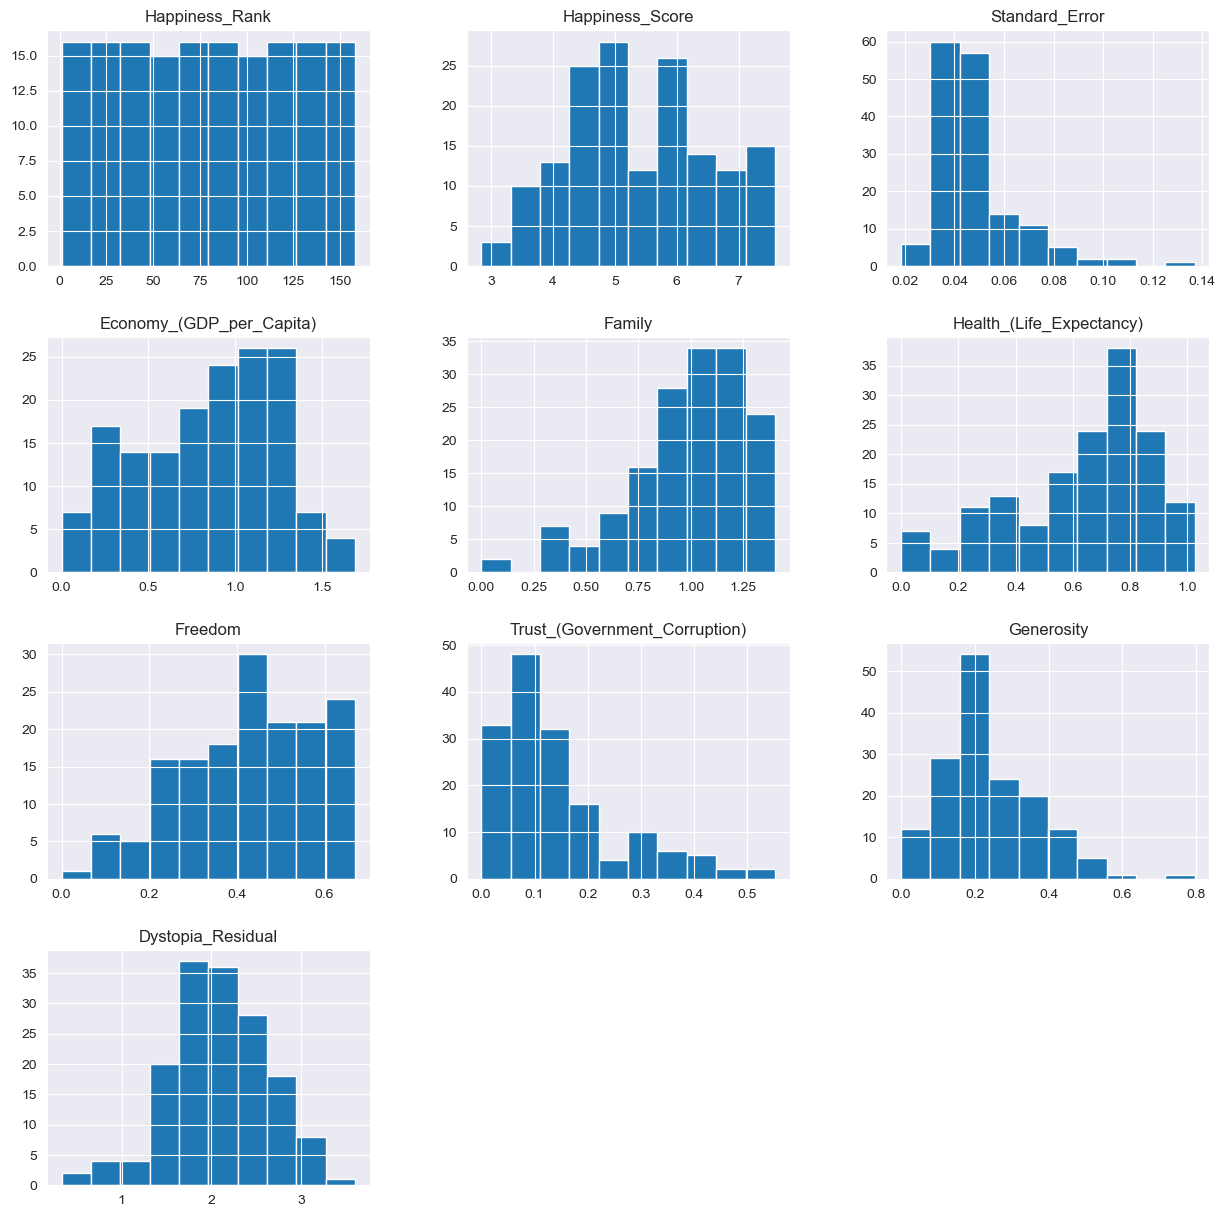

In [13]:
data_2015.hist(figsize=(15,15)) # 2015 yılında ait 6 etkeni ayrı ayrı hisogam grafiğine bakalım.
plt.show()

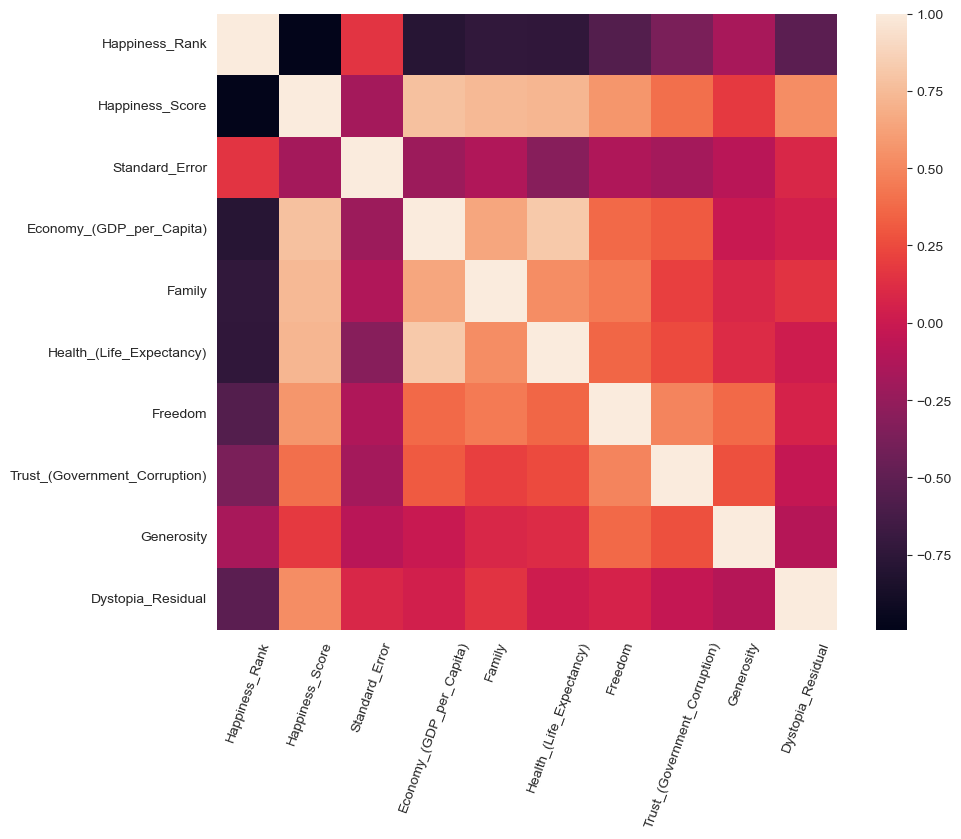

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data_2015.corr())
plt.xticks(rotation=70)
plt.show()

<Figure size 1500x1500 with 0 Axes>

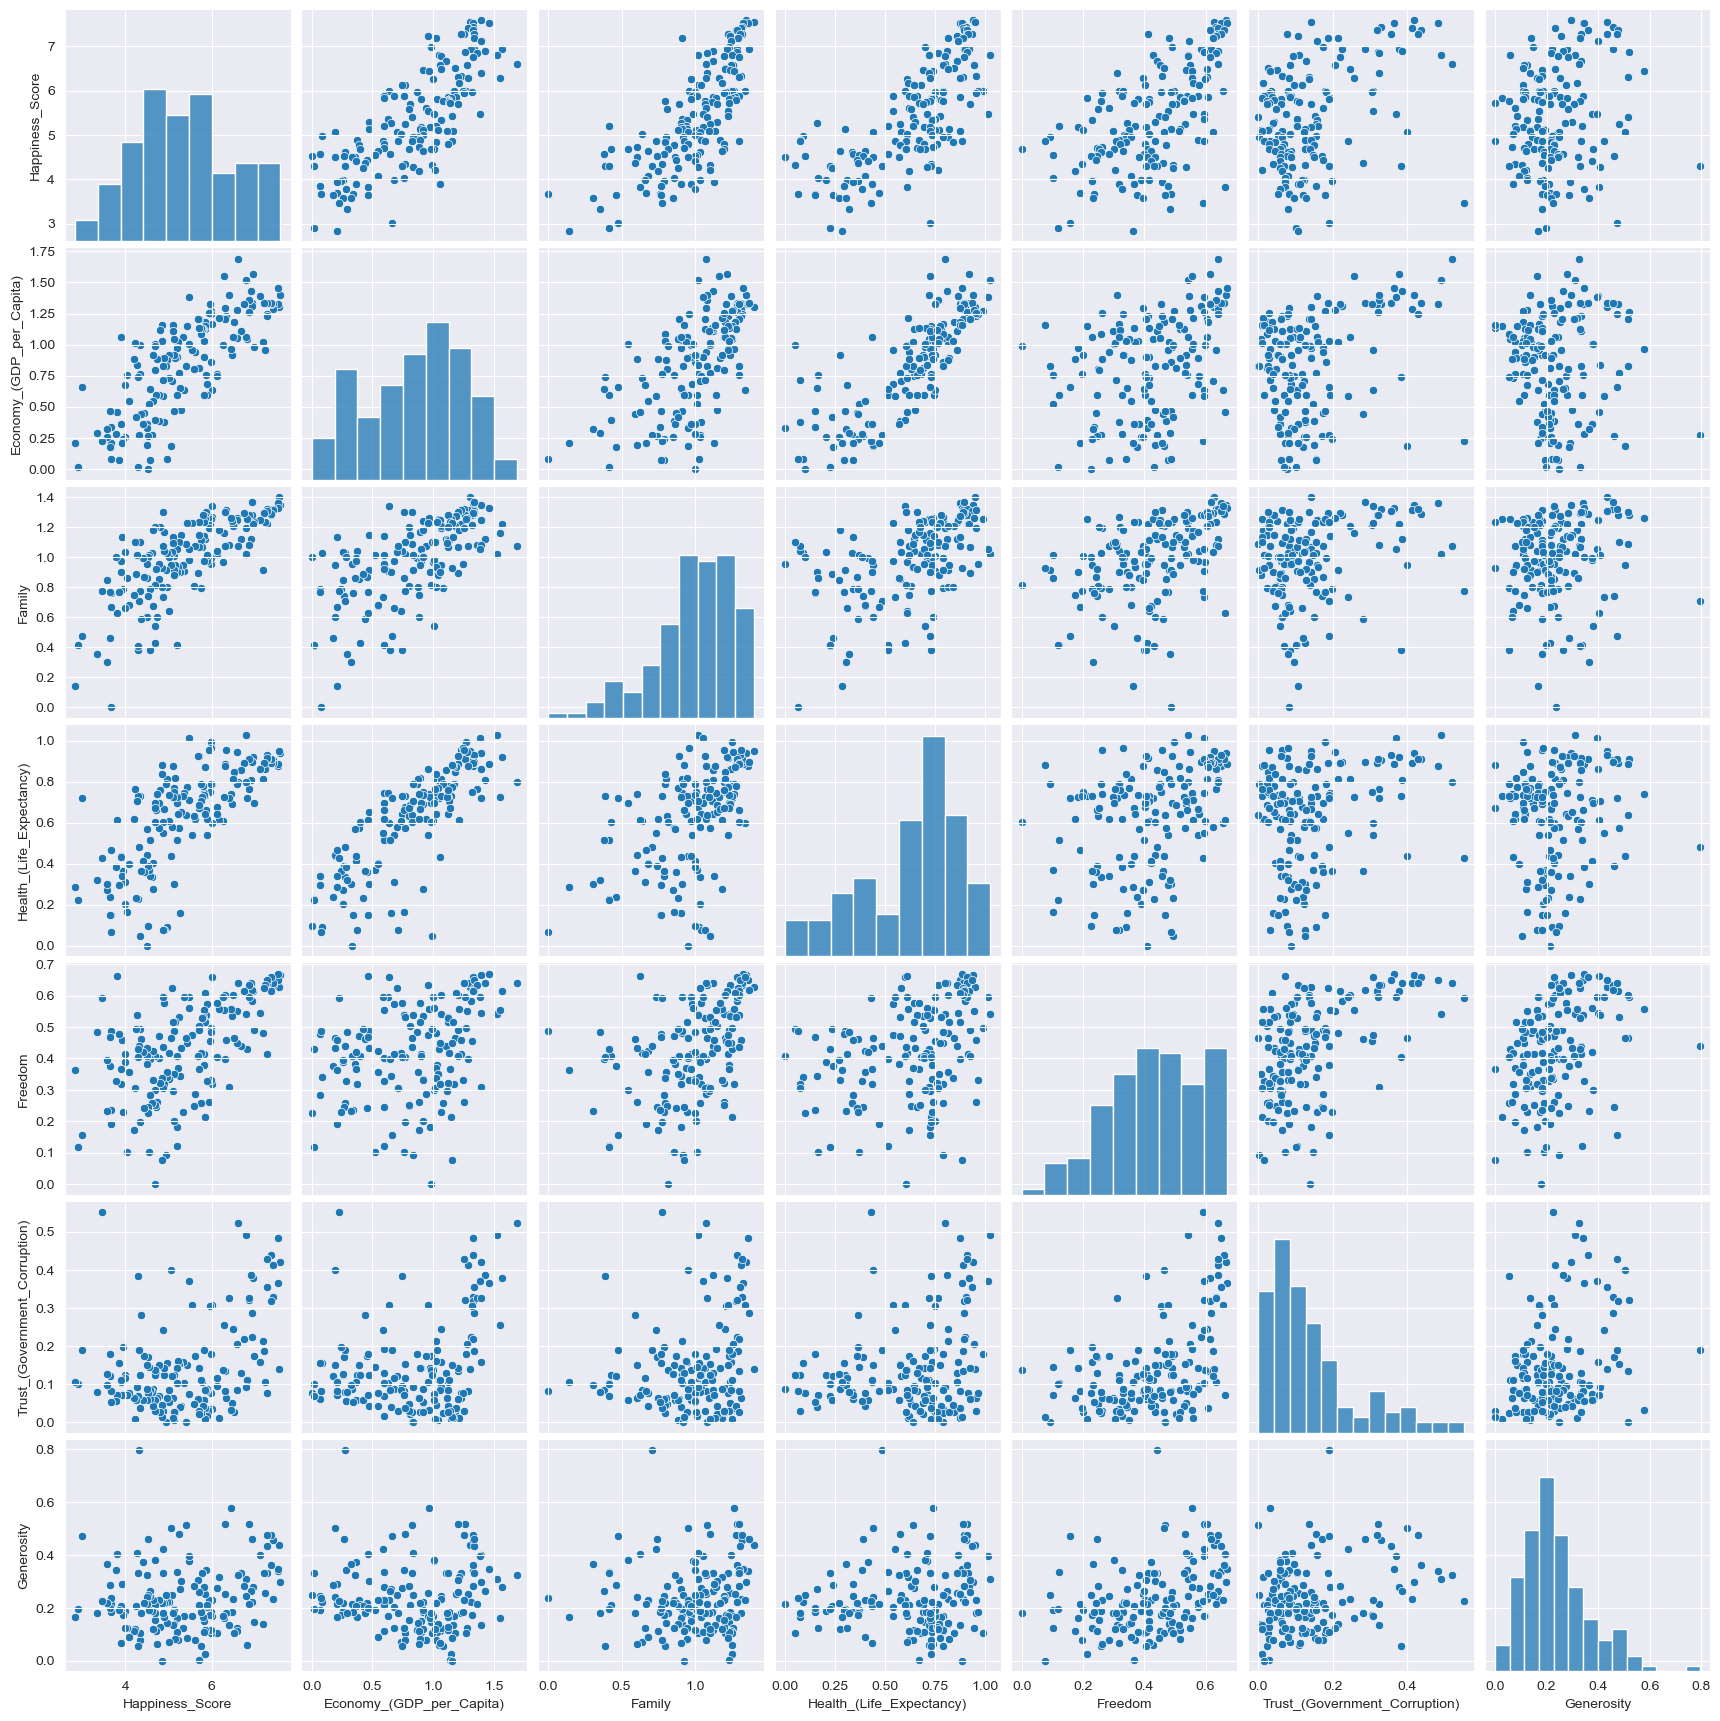

In [15]:
plt.figure(figsize=(15,15))
sns.pairplot(data_2015.loc[:,['Happiness_Score', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity']])
plt.show()

In [16]:
data_2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

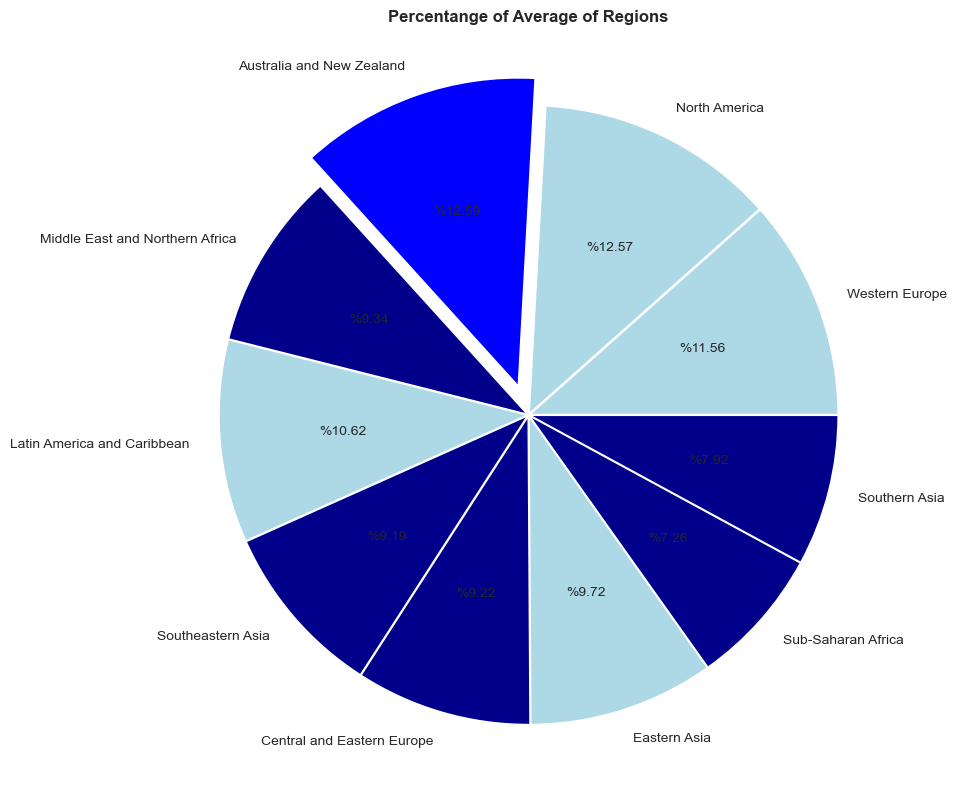

In [17]:
region_avg = {}
for var in data_2015.Region.unique():
    avgg = data_2015[data_2015.Region == var].Happiness_Score.mean()
    region_avg[var] = avgg
    
regions = list(region_avg.keys())
avg_happiness = list(region_avg.values())

plt.figure(figsize=(10, 10))

colors = ["blue" if i==max(avg_happiness) else "lightblue" if i > 5.5 else "darkblue" for i in avg_happiness]
plt.pie(avg_happiness, labels=regions, autopct="%%%.2f",
        explode=[.1 if avg == max(avg_happiness) else .005
                 for avg in list(region_avg.values())],
       colors=colors)
plt.title("Percentange of Average of Regions", weight="bold")

plt.show()

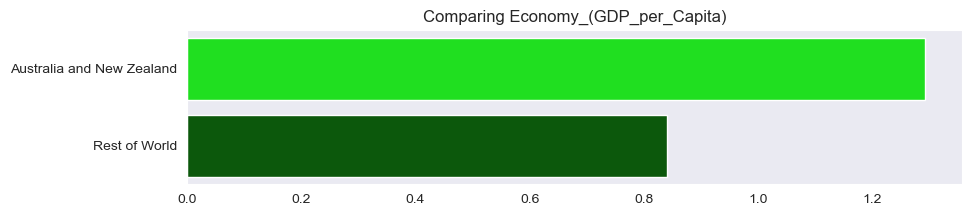

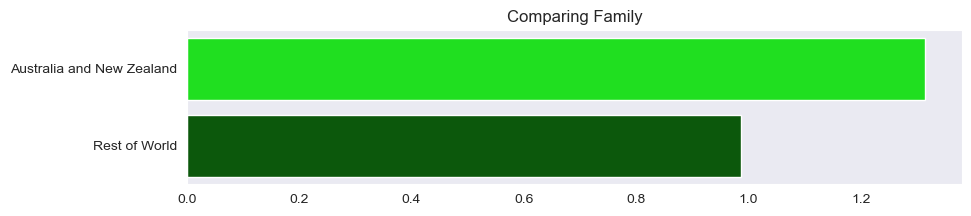

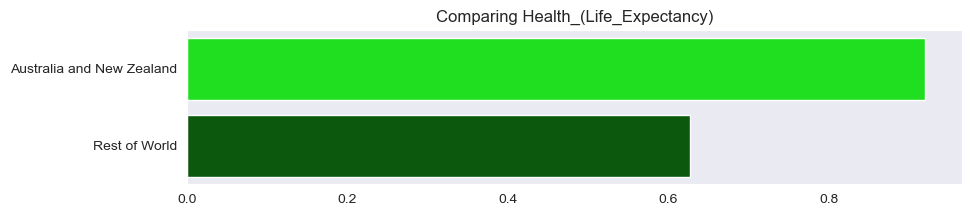

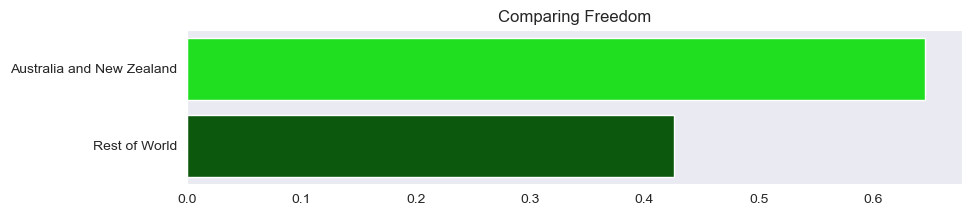

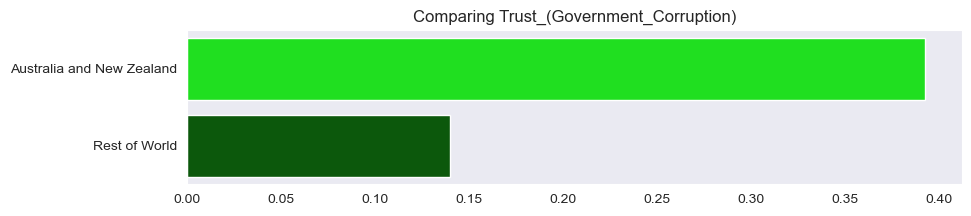

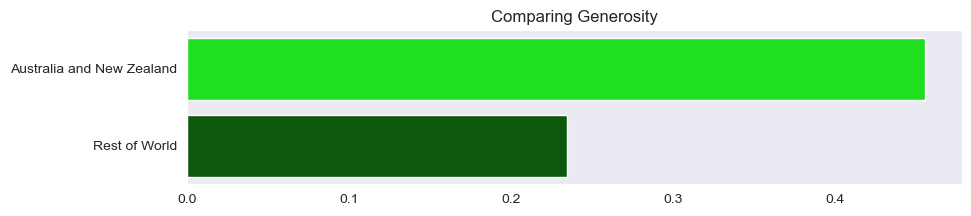

In [36]:
numeric_features = ["Economy_(GDP_per_Capita)", "Family",
                    "Health_(Life_Expectancy)", "Freedom", "Trust_(Government_Corruption)",
                   "Generosity"]

for feature in numeric_features:
    aust_and_new_zeland_avg = data_2015[data_2015.Region == "Australia and New Zealand"][feature].mean()
    rest_of_world_avg = data_2015[data_2015.Region != "Australia and New Zealand"][feature].mean()
    
    plt.figure(figsize=(10, 2))
    plt.grid(False)
    sns.barplot(x=[aust_and_new_zeland_avg, rest_of_world_avg], 
               y=["Australia and New Zealand", "Rest of World"],
               palette = ["lime","darkgreen" if aust_and_new_zeland_avg > rest_of_world_avg else "darkgreen","lime"])
    plt.title(f"Comparing {feature}")
    plt.show()
    

 Yukarıdaki Grafiğe baktığımızda Avusturalya ve Yeni Zellanda'nın (6 faktöre göre) Diğer ülkelerle olan karşılaştırmasını görüyoruz. Baktığımızda 6 faktör içinde ortalamanın çok üstünde bir artışa sahip olduğunu görebiliriz. Bu da Avusturalya ve Yeni Zellanda'yı mutluluk sıralamsında listenin ilk sıralarına taşıyor.

   ### 2015 ve 2016 verilerinin karşılaştırması 

In [38]:
data_2016.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')

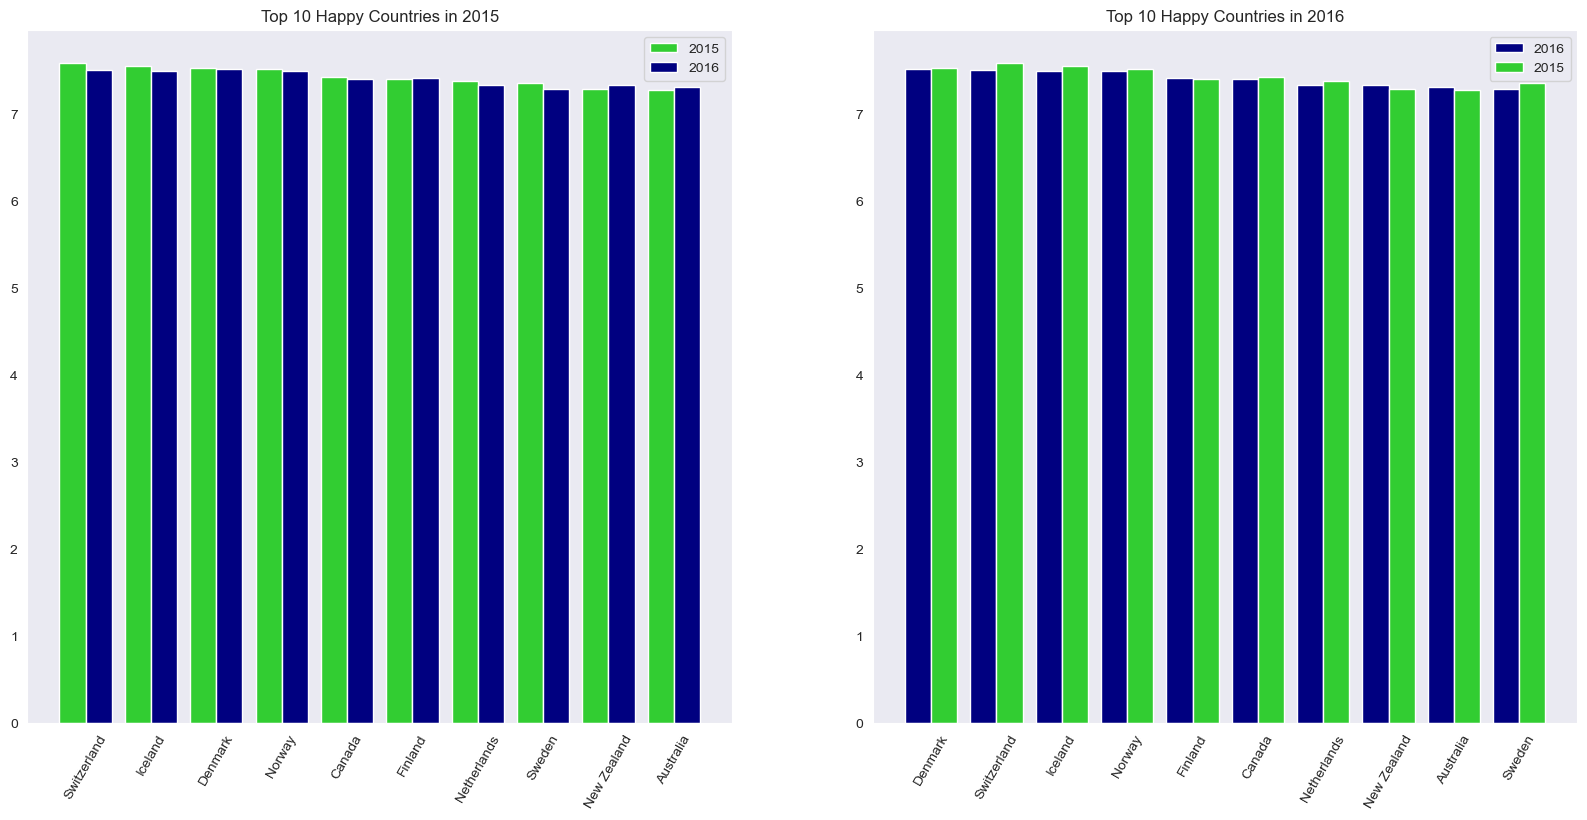

In [39]:
most_happy_countries_2015 = data_2015.Country.head(10)
x = np.arange(10)
width = .4
plt.figure(figsize=(20, 9))
    
plt.subplot(1, 2, 1)
plt.grid(False)
plt.bar(x-.2, data_2015.Happiness_Score.head(10), width, label="2015", color="limegreen")
plt.bar(x+.2, data_2016.set_index("Country").loc[most_happy_countries_2015,"Happiness_Score"],
        width, label="2016", color="navy")
plt.xticks(x, most_happy_countries_2015, rotation=60)
plt.title("Top 10 Happy Countries in 2015")
plt.legend()


most_happy_countries_2016 = data_2016.Country.head(10)

plt.subplot(1, 2, 2)
plt.grid(False)
plt.bar(x-.2, data_2016.Happiness_Score.head(10), width, label="2016", color="navy")
plt.bar(x+.2, data_2015.set_index("Country").loc[most_happy_countries_2016,"Happiness_Score"],
        width, label="2015", color="limegreen")

plt.xticks(x, most_happy_countries_2016, rotation=60)
plt.title("Top 10 Happy Countries in 2016")
plt.legend()
    
plt.show()

### 2015 ve 2016 yıllarını karşılaştıralım (İlk 10 Ülke).

- Genel olarak baktığımızda 1 yıl içerisine sıralamada bir değişiklik oladığını görebiliriz. Mutluluk skoru en fazla olan ülkeler için.
- 2015 yılında İsviçre'nin skorunun fazla olduğunu 2016 yılında ise Danimarka'nın fazlaolduğunu söyleyebiliriz.

### Değişimi en fazla olan ülkeleri analiz edelim.

In [21]:
happiness_change = {}
for country in data_2015.Country:
    try:
        happiness_2015 = data_2015.set_index("Country").loc[country, "Happiness_Score"]
        happiness_2016 = data_2016.set_index("Country").loc[country, "Happiness_Score"]
        change = happiness_2016 - happiness_2015
        happiness_change[country] = change
    except:
        continue

In [22]:
top_10_changed_countries = [x for x in zip(list(happiness_change.keys()), list(happiness_change.values()))]
top_10_changed_countries.sort(key=lambda x: -abs(x[1]))
top_10_changed_countries =  top_10_changed_countries[:10]
top_10_changed_countries

[('Liberia', -0.9489999999999998),
 ('Algeria', 0.75),
 ('Venezuela', -0.726),
 ('Haiti', -0.4900000000000002),
 ('Togo', 0.46399999999999997),
 ('Latvia', 0.46199999999999974),
 ('Zimbabwe', -0.4170000000000007),
 ('Sudan', -0.4109999999999996),
 ('Mexico', -0.4090000000000007),
 ('Romania', 0.4039999999999999)]

In [23]:
countries = [each[0] for each in top_10_changed_countries]
scores_2016 = [data_2016.set_index("Country").loc[country,"Happiness_Score"] for country in countries]
scores_2015 = [data_2015.set_index("Country").loc[country,"Happiness_Score"] for country in countries]

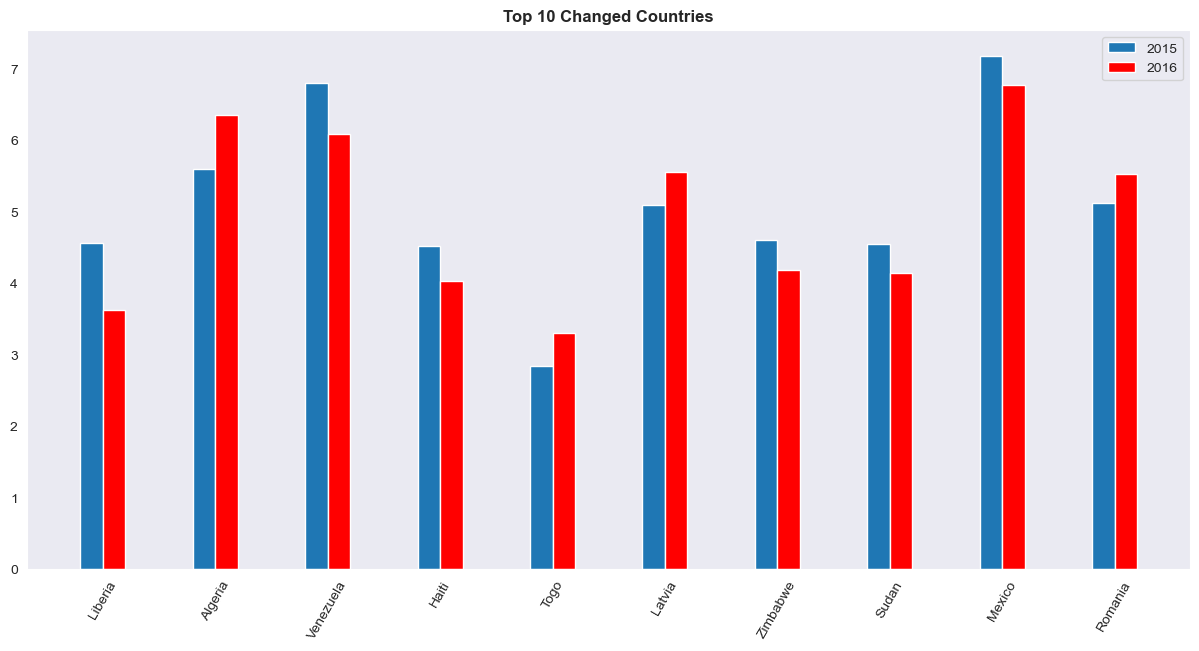

In [24]:
countries = [each[0] for each in top_10_changed_countries]
scores_2016 = [data_2016.set_index("Country").loc[country,"Happiness_Score"] for country in countries]
scores_2015 = [data_2015.set_index("Country").loc[country,"Happiness_Score"] for country in countries]


plt.figure(figsize=(15, 7))
plt.grid(False)

x = np.arange(10)
width = .2

plt.bar(x-.1, scores_2015, width, label="2015")
plt.bar(x+.1, scores_2016, width, label="2016", color="red")

plt.legend()
plt.xticks(x, countries, rotation=60)
plt.title("Top 10 Changed Countries", weight="bold")
plt.show()

In [25]:
scores_2015

[4.571, 5.605, 6.81, 4.518, 2.839, 5.098, 4.61, 4.55, 7.187, 5.124]

In [26]:
scores_2016

[3.622, 6.355, 6.084, 4.028, 3.303, 5.56, 4.193, 4.139, 6.778, 5.528]

### Grafikte ve çıktılarda görüldüğü üzere;
- Liberya en çok değişim(negatif olarak) göstermiş ülke iken (Mutluluk oranı azalmıştır.)
- Romanya en az değişim(pozitif olarak) göstermiş ülke olmuştur.(Mutluluk oranı artmıştır.)



### 2016 ve 2017 verilerinin karşılaştırması 

In [27]:
data_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [28]:
for data in datasets:
    new_columns = [column.replace(".", "_") for column in data.columns]
    data.set_axis(new_columns, axis=1, inplace=True)

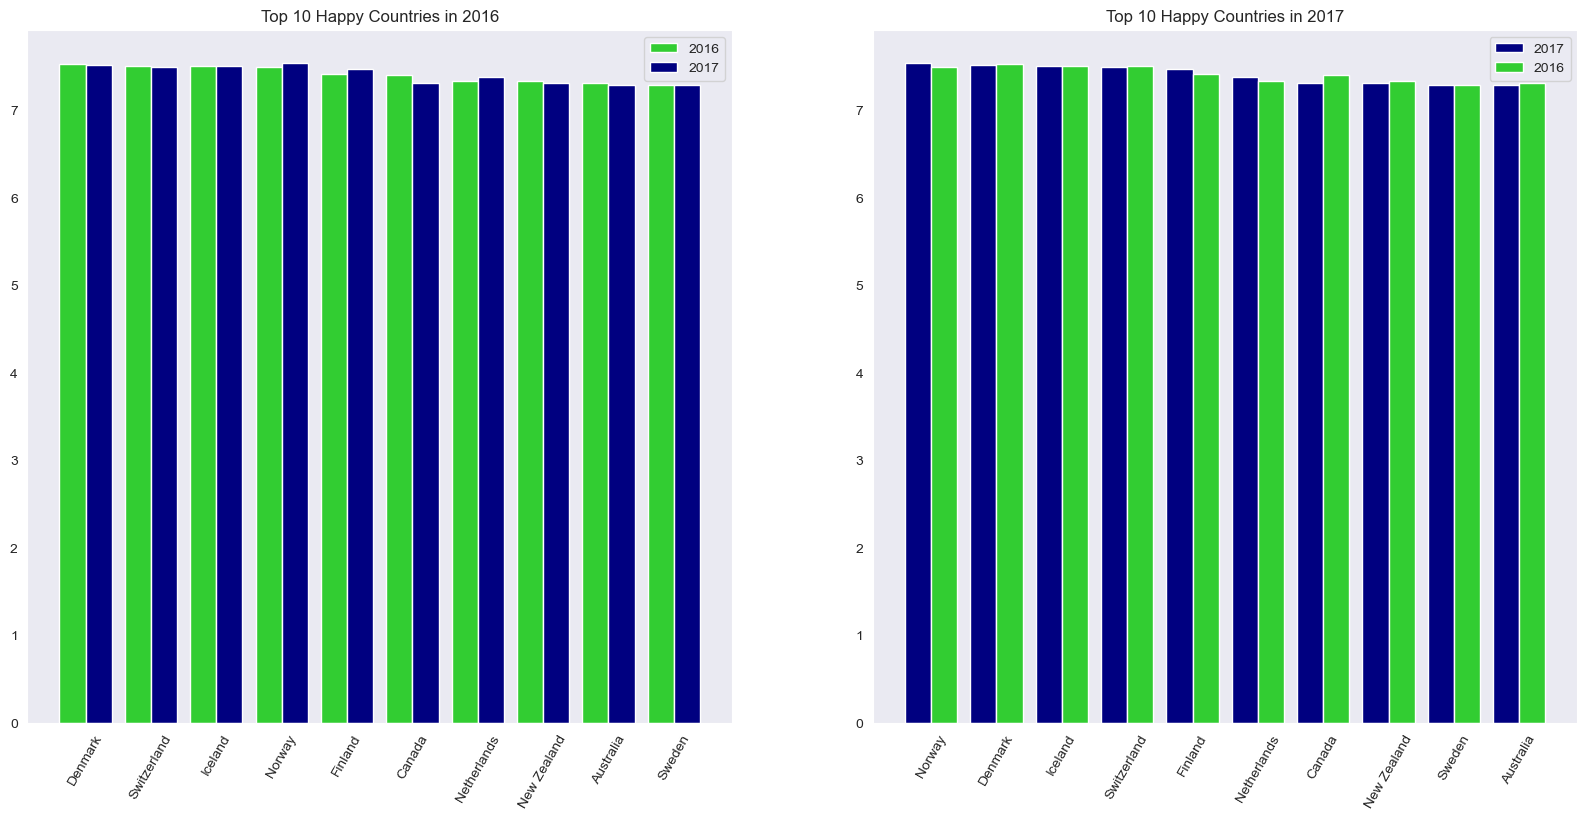

In [29]:
most_happy_countries_2016 = data_2016.Country.head(10)
x = np.arange(10)
width = .4
plt.figure(figsize=(20, 9))
    
plt.subplot(1, 2, 1)
plt.grid(False)
plt.bar(x-.2, data_2016.Happiness_Score.head(10), width, label="2016", color="limegreen")
plt.bar(x+.2, data_2017.set_index("Country").loc[most_happy_countries_2016,"Happiness_Score"],
        width, label="2017", color="navy")
plt.xticks(x, most_happy_countries_2016, rotation=60)
plt.title("Top 10 Happy Countries in 2016")
plt.legend()


most_happy_countries_2017 = data_2017.Country.head(10)

plt.subplot(1, 2, 2)
plt.grid(False)
plt.bar(x-.2, data_2017.Happiness_Score.head(10), width, label="2017", color="navy")
plt.bar(x+.2, data_2016.set_index("Country").loc[most_happy_countries_2017,"Happiness_Score"],
        width, label="2016", color="limegreen")

plt.xticks(x, most_happy_countries_2017, rotation=60)
plt.title("Top 10 Happy Countries in 2017")
plt.legend()
    
plt.show()

### Değişimi en fazla olan ülkeleri analiz edelim.


In [40]:
happiness_change = {}
for country in data_2016.Country:
    try:
        happiness_2016 = data_2016.set_index("Country").loc[country, "Happiness_Score"]
        happiness_2017 = data_2017.set_index("Country").loc[country, "Happiness_Score"]
        change = happiness_2017 - happiness_2016
        happiness_change[country] = change
    except:
        continue

In [41]:
top_10_changed_countries = [x for x in zip(list(happiness_change.keys()), list(happiness_change.values()))]
top_10_changed_countries.sort(key=lambda x: -abs(x[1]))
top_10_changed_countries =  top_10_changed_countries[:10]
top_10_changed_countries

[('Venezuela', -0.8339999999999996),
 ('Bulgaria', 0.4970002250671399),
 ('Algeria', -0.4829997825622607),
 ('Afghanistan', 0.43399991035460994),
 ('Haiti', -0.42500007438659937),
 ('Syria', 0.39299989318848016),
 ('Egypt', 0.37300013351439976),
 ('South Africa', 0.36999999618530044),
 ('Gabon', 0.3440001525878893),
 ('Uganda', 0.3419998512268103)]

In [42]:
countries = [each[0] for each in top_10_changed_countries]
scores_2017 = [data_2017.set_index("Country").loc[country,"Happiness_Score"] for country in countries]
scores_2016 = [data_2016.set_index("Country").loc[country,"Happiness_Score"] for country in countries]

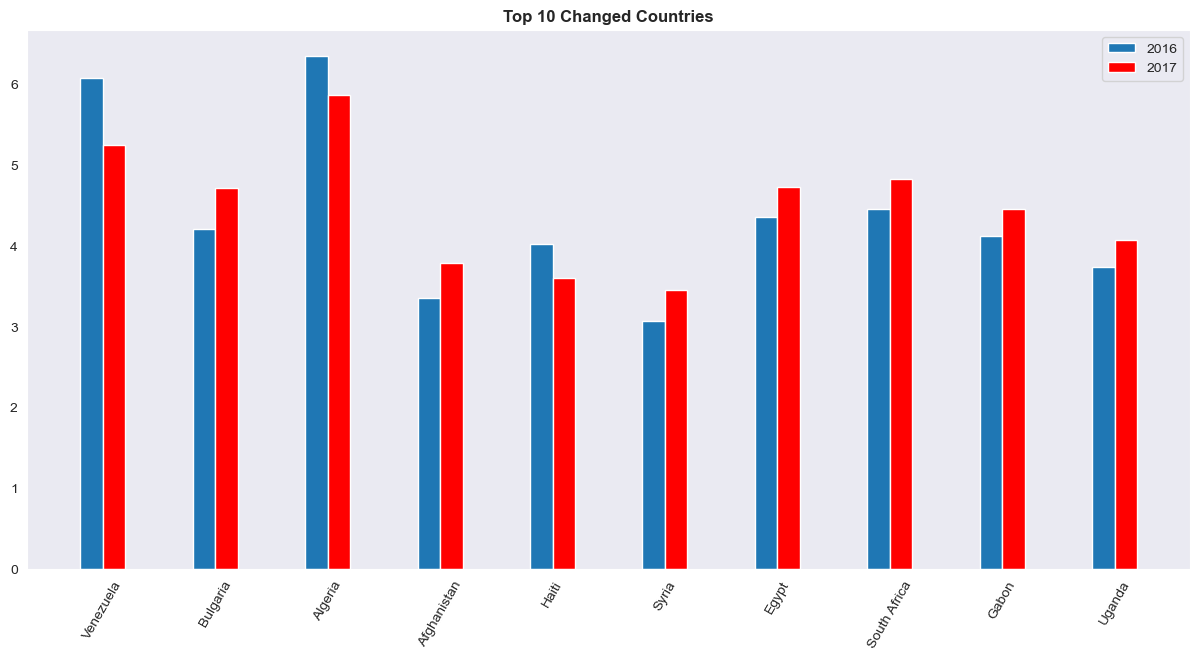

In [43]:
plt.figure(figsize=(15, 7))
plt.grid(False)

x = np.arange(10)
width = .2

plt.bar(x-.1, scores_2016, width, label="2016")
plt.bar(x+.1, scores_2017, width, label="2017", color="red")

plt.legend()
plt.xticks(x, countries, rotation=60)
plt.title("Top 10 Changed Countries", weight="bold")
plt.show()

In [44]:
scores_2016


[6.084, 4.217, 6.355, 3.36, 4.028, 3.069, 4.362, 4.459, 4.121, 3.739]

In [45]:
scores_2017

[5.25,
 4.71400022506714,
 5.87200021743774,
 3.79399991035461,
 3.6029999256134,
 3.46199989318848,
 4.7350001335144,
 4.8289999961853,
 4.46500015258789,
 4.08099985122681]

### Grafikte ve çıktılarda görüldüğü üzere;
- Venezuela en çok değişim(negatif olarak) göstermiş ülke iken (Mutluluk oranı azalmıştır.)
- Uganda en az değişim(pozitif olarak) göstermiş ülke olmuştur.(Mutluluk oranı artmıştır.)